In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
# 데이터 불러오기

df = pd.read_csv('../data/BankChurners.csv')
df.drop('CLIENTNUM', axis=1, inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)

In [3]:
# 컬럼 이름 변경
df.rename(columns={
    'Attrition_Flag' : 'Exited',
    'Customer_Age' : 'Age',
    'Dependent_count' : 'Dependents',
    'Education_Level' : 'Education', 
    'Marital_Status' : 'Marital', 
    'Income_Category' : 'Income', 
    'Card_Category' : 'Card_type',
    'Months_on_book' : 'Tenure', 
    'Total_Relationship_Count' : 'Product_Cnt', 
    'Months_Inactive_12_mon' : 'Inactive_Months',
    'Contacts_Count_12_mon' : 'Contacts_Cnt', 
    'Total_Revolving_Bal' : 'Revolv_Bal',   
    'Avg_Open_To_Buy' : 'Avg_OTB', 
    'Total_Amt_Chng_Q4_Q1' : 'Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt' : 'Trans_Amt',
    'Total_Trans_Ct' : 'Trans_Cnt', 
    'Total_Ct_Chng_Q4_Q1' : 'Cnt_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio' : 'Avg_Util_Ratio'
}, inplace=True)

In [4]:
# 컬럼 순서변경
df = df[['Exited', 'Age', 'Gender', 'Dependents', 'Education', 'Marital', 'Income', 'Card_type', 'Tenure', 'Product_Cnt', 'Inactive_Months',
         'Contacts_Cnt', 'Credit_Limit', 'Revolv_Bal', 'Avg_OTB', 'Avg_Util_Ratio', 'Trans_Amt', 'Trans_Cnt', 'Amt_Chng_Q4_Q1',  'Cnt_Chng_Q4_Q1']]

In [5]:
# 이탈고객은 1  / 유지고객은 0으로 데이터 변경
df.loc[df['Exited'] == 'Existing Customer', 'Exited'] = 0
df.loc[df['Exited'] == 'Attrited Customer', 'Exited'] = 1
df['Exited'] = df['Exited'].astype(int)

In [6]:
df.head()

,Exited,Age,Gender,Dependents,Education,Marital,Income,Card_type,Tenure,Product_Cnt,Inactive_Months,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,0.061,1144,42,1.335,1.625
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,0.105,1291,33,1.541,3.714
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,0.000,1887,20,2.594,2.333
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,0.760,1171,20,1.405,2.333
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,0.000,816,28,2.175,2.500


In [7]:
df['Card_type'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Education'])
df['le_Education'] = le.transform(df['Education'])
df.head()


,Exited,Age,Gender,Dependents,Education,Marital,Income,Card_type,Tenure,Product_Cnt,...,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1,le_Education
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,0.061,1144,42,1.335,1.625,3
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,0.105,1291,33,1.541,3.714,2
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,0.000,1887,20,2.594,2.333,2
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,0.760,1171,20,1.405,2.333,3
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,0.000,816,28,2.175,2.500,5


In [9]:
df['Revolv_Bal'] / df['Credit_Limit']

0        0.061224
1        0.104651
2        0.000000
3        0.759734
4        0.000000
           ...   
10122    0.462403
10123    0.511106
10124    0.000000
10125    0.000000
10126    0.188776
Length: 10127, dtype: float64

In [10]:
df.describe()

,Exited,Age,Dependents,Tenure,Product_Cnt,Inactive_Months,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1,le_Education
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.274894,4404.086304,64.858695,0.759941,0.712222,3.096574
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.275691,3397.129254,23.472570,0.219207,0.238086,1.834812
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.023000,2155.500000,45.000000,0.631000,0.582000,2.000000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.176000,3899.000000,67.000000,0.736000,0.702000,3.000000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.503000,4741.000000,81.000000,0.859000,0.818000,5.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,0.999000,18484.000000,139.000000,3.397000,3.714000,6.000000


C:\Users\gks76\AppData\Local\Temp\ipykernel_3756\3196579609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


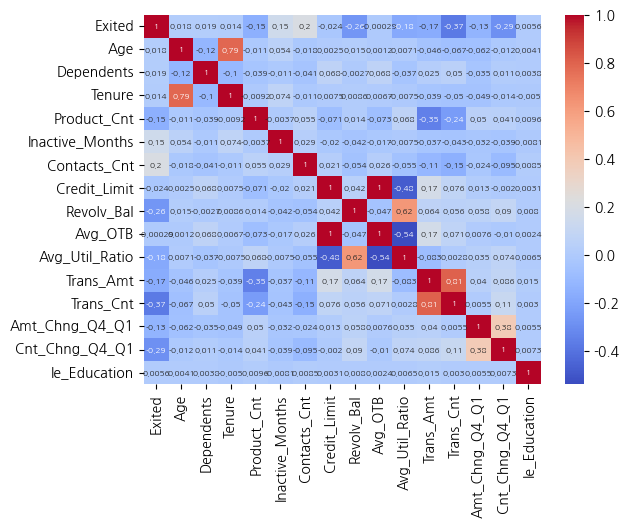

In [11]:
# 상관관계 히트맵
corr_df = df.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', annot_kws={'size':6});

In [12]:
df.corr()['Exited'].abs().sort_values(ascending=False)

C:\Users\gks76\AppData\Local\Temp\ipykernel_3756\422716366.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited'].abs().sort_values(ascending=False)


Exited             1.000000
Trans_Cnt          0.371403
Cnt_Chng_Q4_Q1     0.290054
Revolv_Bal         0.263053
Contacts_Cnt       0.204491
Avg_Util_Ratio     0.178410
Trans_Amt          0.168598
Inactive_Months    0.152449
Product_Cnt        0.150005
Amt_Chng_Q4_Q1     0.131063
Credit_Limit       0.023873
Dependents         0.018991
Age                0.018203
Tenure             0.013687
le_Education       0.005551
Avg_OTB            0.000285
Name: Exited, dtype: float64

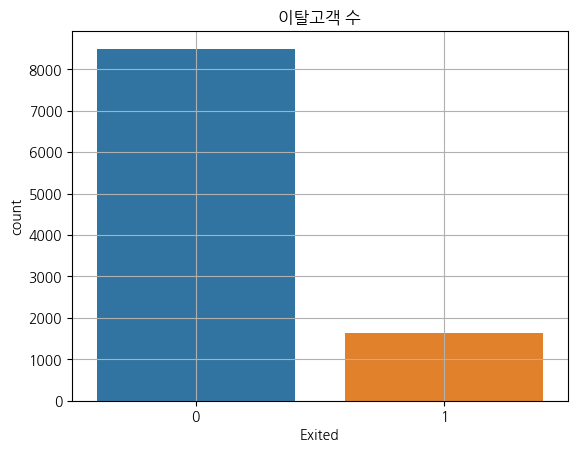

In [13]:
# 이탈고객 수
sns.countplot(data=df, x='Exited')
plt.title('이탈고객 수')
plt.grid()
plt.show();

### Contacts_Cnt

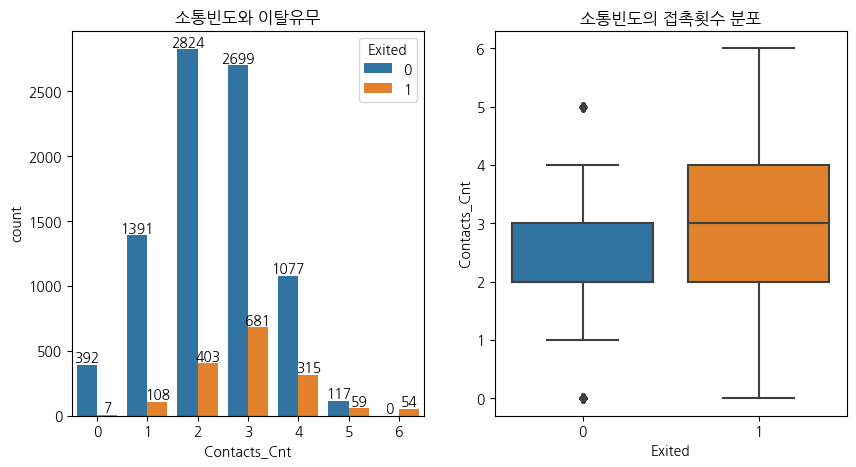

In [14]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.countplot(x='Contacts_Cnt', hue='Exited', data=df, ax= ax[0])
for label in ax1.containers:
    ax1.bar_label(label)
ax1.set_title('소통빈도와 이탈유무')
ax2 = sns.boxplot(data= df, y= 'Contacts_Cnt', x= 'Exited', ax= ax[1])
ax2.set_title('소통빈도의 접촉횟수 분포')
plt.show()

- 접촉횟수가 4번인 고객은 1/4 정도가 이탈
- 접촉횟수가 5번인 고객의 1/3 정도가 이탈
- 접촉횟수가 6번인 고객은 전부 이탈
- 접촉횟수가 증가할수록 이탈 할 확률이 커진다?

In [15]:
# 이탈 고객 데이터
df_churn = df[df['Exited'] == 1]

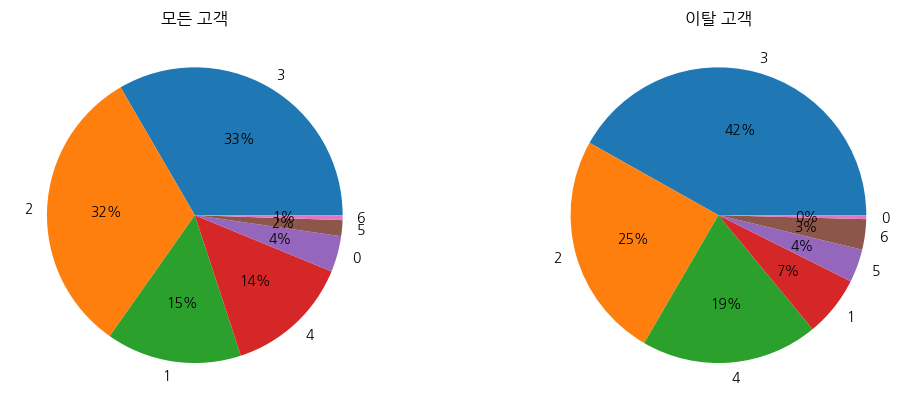

In [16]:
plt.subplot(1,2,1)
plt.pie(df['Contacts_Cnt'].value_counts(),labels= ['3','2','1','4','0','5','6'],autopct='%.0f%%')
plt.title("모든 고객")

plt.subplot(1,2,2)
plt.pie(df_churn['Contacts_Cnt'].value_counts(), labels=['3','2','4','1','5','6','0'],autopct='%.0f%%')
plt.title("이탈 고객")

plt.subplots_adjust(left = 0.5, right = 2)

In [17]:
df.columns

Index(['Exited', 'Age', 'Gender', 'Dependents', 'Education', 'Marital',
       'Income', 'Card_type', 'Tenure', 'Product_Cnt', 'Inactive_Months',
       'Contacts_Cnt', 'Credit_Limit', 'Revolv_Bal', 'Avg_OTB',
       'Avg_Util_Ratio', 'Trans_Amt', 'Trans_Cnt', 'Amt_Chng_Q4_Q1',
       'Cnt_Chng_Q4_Q1', 'le_Education'],
      dtype='object')

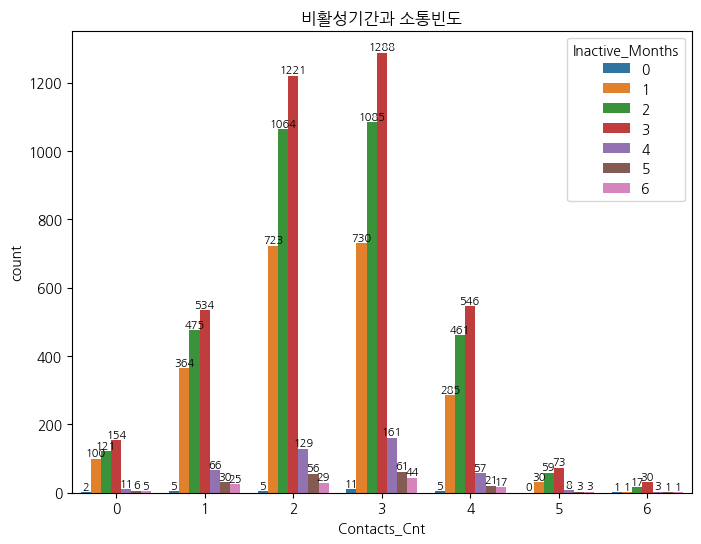

In [18]:
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(x='Contacts_Cnt', hue='Inactive_Months', data=df)
for label in ax1.containers:
    ax1.bar_label(label, fontsize=8)
ax1.set_title('비활성기간과 소통빈도')
plt.show()

- 소통빈도에 따라 비활성기간은 3개월이 주로 많음
- 모든 소통빈도에 따라 비활성기간은 정규분포

---

### Credit_Limit

In [19]:
df['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

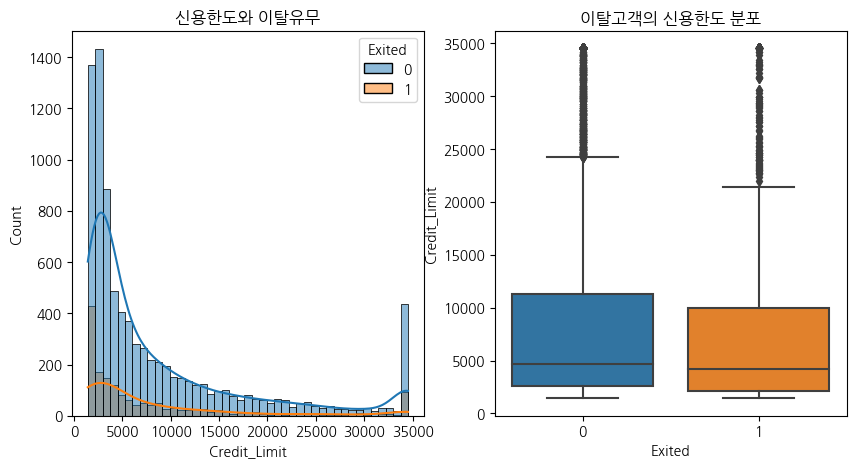

In [20]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(x='Credit_Limit', data=df, hue='Exited', ax=ax[0], kde=True)
ax1.set_title('신용한도와 이탈유무')

ax2 = sns.boxplot(data= df, y='Credit_Limit', x= 'Exited', ax= ax[1])
ax2.set_title('이탈고객의 신용한도 분포')
plt.show()

- 분포에 약간의 차이가 보임

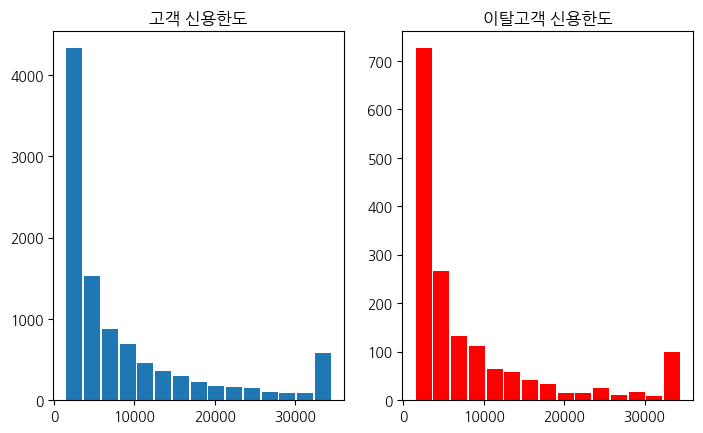

In [21]:
plt.subplot(1,2,1)
plt.hist(df['Credit_Limit'], rwidth = 0.9, bins = 15)
plt.title('고객 신용한도')

plt.subplot(1,2,2)
plt.hist(df_churn['Credit_Limit'], rwidth = 0.9, color = 'r', bins = 15)
plt.title('이탈고객 신용한도')

plt.subplots_adjust(left = 1, right = 2)

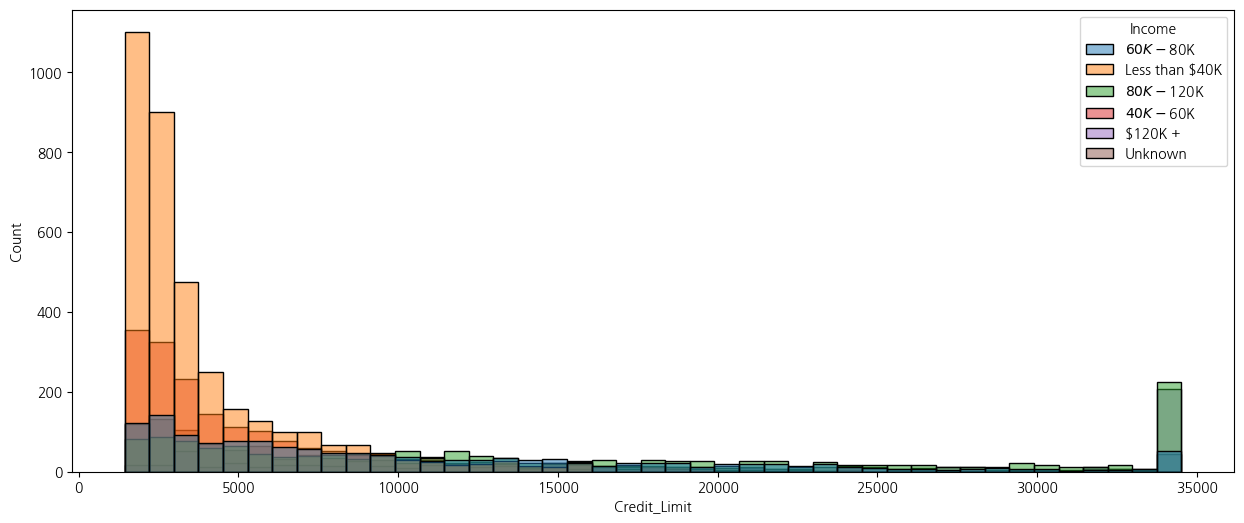

In [22]:
plt.figure(figsize=(15,6))              
sns.histplot(x='Credit_Limit', data=df, hue='Income')
plt.show();

---

### Revolv_Bal

In [23]:
df['Revolv_Bal'].sort_values()

6189       0
7953       0
1655       0
8700       0
4593       0
        ... 
3631    2517
507     2517
3633    2517
1009    2517
9748    2517
Name: Revolv_Bal, Length: 10127, dtype: int64

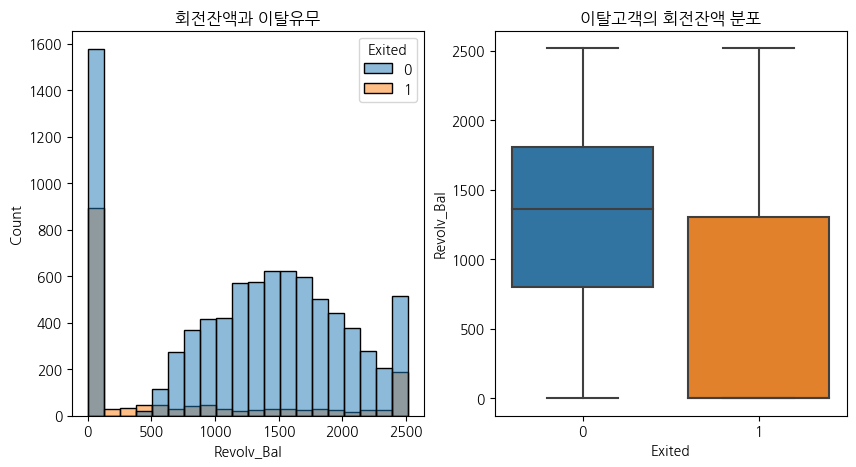

In [24]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(x='Revolv_Bal', data=df, hue='Exited', ax=ax[0])
ax1.set_title('회전잔액과 이탈유무')

ax2 = sns.boxplot(data= df, y='Revolv_Bal', x= 'Exited', ax= ax[1])
ax2.set_title('이탈고객의 회전잔액 분포')
plt.show()

- 회전잔액이 0이면 절반정도가 이탈
- 회전잔액이 0~500사이면 이탈하는 고객이 많음
- 회전잔액이 2500부근에선 약 30% 고객이 이탈
- 예측변수로 사용해도 괜찮을 것 같음

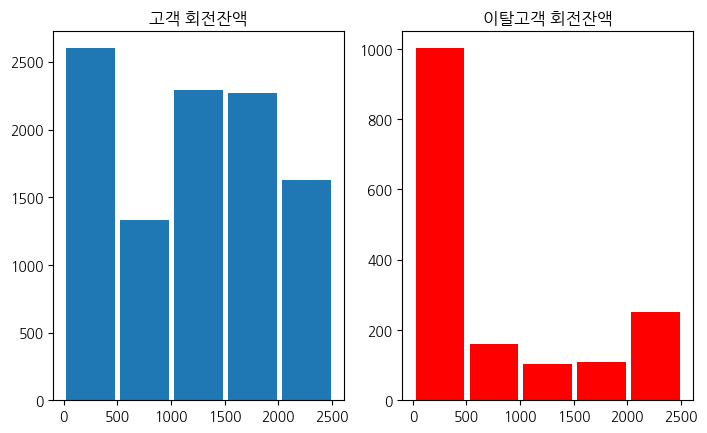

In [25]:
plt.subplot(1,2,1)
plt.hist(df['Revolv_Bal'], rwidth = 0.9, bins = 5)
plt.title('고객 회전잔액')

plt.subplot(1,2,2)
plt.hist(df_churn['Revolv_Bal'], rwidth = 0.9, color = 'r', bins = 5)
plt.title('이탈고객 회전잔액')

plt.subplots_adjust(left = 1, right = 2)

In [26]:
# fig, ax = plt.subplots(1, 2, figsize= (10, 5))

# ax1 = sns.histplot(x='Revolv_Bal', data=df, ax=ax[0])
# ax1.set_title('회전잔액과 이탈유무')

# ax2 = sns.histplot(x='Credit_Limit', hue='Revolv_Bal', data=df, ax= ax[1])
# ax2.set_title('신용한도와 회전잔액 분포')
# plt.show()

---

### Avg_OTB

In [27]:
df['Avg_OTB'].sort_values()

4443        3.0
7649       10.0
7955       14.0
1999       14.0
1452       15.0
         ...   
9461    34516.0
9455    34516.0
5256    34516.0
2940    34516.0
9047    34516.0
Name: Avg_OTB, Length: 10127, dtype: float64

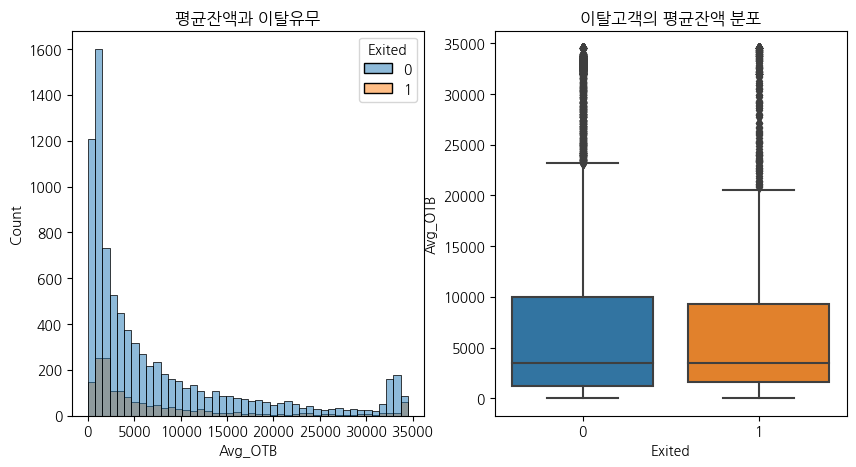

In [28]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(x='Avg_OTB', data=df, hue='Exited', ax=ax[0])
ax1.set_title('평균잔액과 이탈유무')

ax2 = sns.boxplot(data= df, y='Avg_OTB', x= 'Exited', ax= ax[1])
ax2.set_title('이탈고객의 평균잔액 분포')
plt.show()

- 평균잔액 3000 정도에서 약 30%의 이탈률
- 평균잔액 34000 정도에서 높은 이탈률
- 두 분포는 비슷하게 생김

In [29]:
df.corr()['Avg_OTB'].abs().sort_values(ascending=False)[:3]

C:\Users\gks76\AppData\Local\Temp\ipykernel_3756\3576121311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Avg_OTB'].abs().sort_values(ascending=False)[:3]


Avg_OTB           1.000000
Credit_Limit      0.995981
Avg_Util_Ratio    0.538808
Name: Avg_OTB, dtype: float64

- Credit_Limit과 거의 완벽한 양의 선형 관계

In [30]:
df[['Credit_Limit', 'Revolv_Bal', 'Avg_OTB']]

,Credit_Limit,Revolv_Bal,Avg_OTB
0,12691.0,777,11914.0
1,8256.0,864,7392.0
2,3418.0,0,3418.0
3,3313.0,2517,796.0
4,4716.0,0,4716.0
...,...,...,...
10122,4003.0,1851,2152.0
10123,4277.0,2186,2091.0
10124,5409.0,0,5409.0
10125,5281.0,0,5281.0


- Avg_OTB = Credit_Limit - Revolv_Bal

In [31]:
df['Credit_Limit'] - df['Revolv_Bal']

0        11914.0
1         7392.0
2         3418.0
3          796.0
4         4716.0
          ...   
10122     2152.0
10123     2091.0
10124     5409.0
10125     5281.0
10126     8427.0
Length: 10127, dtype: float64

### 회전잔액 VS 평균잔액

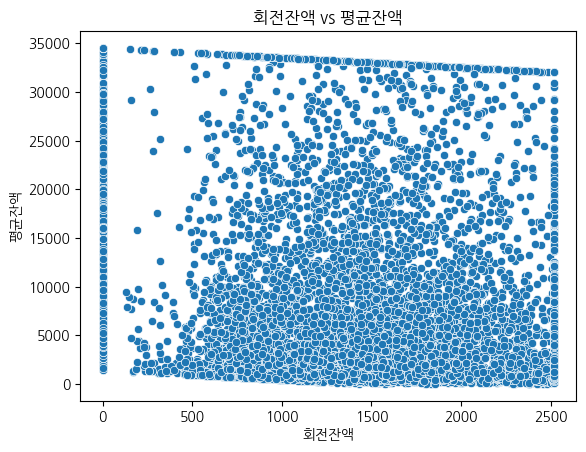

In [32]:
sns.scatterplot(x='Revolv_Bal', y='Avg_OTB', data=df)
plt.xlabel('회전잔액')
plt.ylabel('평균잔액')
plt.title('회전잔액 vs 평균잔액')
plt.show()

In [33]:
df[(df['Marital'] == 'Unknown') & (df['Education'] == 'Unknown') & (df['Income'] == 'Unknown')]

,Exited,Age,Gender,Dependents,Education,Marital,Income,Card_type,Tenure,Product_Cnt,...,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1,le_Education
1374,0,61,F,0,Unknown,Unknown,Unknown,Blue,36,4,...,2,1801.0,0,1801.0,0.000,3193,62,1.234,1.480,6
1456,0,50,F,5,Unknown,Unknown,Unknown,Blue,43,5,...,2,3410.0,2281,1129.0,0.669,1296,31,0.518,0.348,6
2928,0,43,F,4,Unknown,Unknown,Unknown,Blue,34,5,...,3,12778.0,1528,11250.0,0.120,3337,69,0.777,0.769,6
3207,0,26,F,0,Unknown,Unknown,Unknown,Blue,18,3,...,3,12463.0,1319,11144.0,0.106,3996,71,0.655,0.543,6
6721,0,29,F,1,Unknown,Unknown,Unknown,Blue,36,6,...,2,7270.0,1835,5435.0,0.252,3759,69,0.860,0.917,6
7544,1,48,F,3,Unknown,Unknown,Unknown,Blue,36,3,...,2,4431.0,2517,1914.0,0.568,2185,48,0.499,0.371,6
9893,0,42,F,3,Unknown,Unknown,Unknown,Blue,36,6,...,2,15648.0,0,15648.0,0.000,13784,88,0.731,0.913,6


In [34]:
df[(df['Marital'] == 'Unknown') & (df['Education'] == 'Unknown')]

,Exited,Age,Gender,Dependents,Education,Marital,Income,Card_type,Tenure,Product_Cnt,...,Contacts_Cnt,Credit_Limit,Revolv_Bal,Avg_OTB,Avg_Util_Ratio,Trans_Amt,Trans_Cnt,Amt_Chng_Q4_Q1,Cnt_Chng_Q4_Q1,le_Education
15,0,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,...,2,4234.0,972,3262.0,0.230,1348,27,1.707,1.700,6
81,0,44,M,1,Unknown,Unknown,$120K +,Blue,36,6,...,2,34516.0,1533,32983.0,0.044,1603,29,0.924,0.526,6
211,0,59,M,0,Unknown,Unknown,$80K - $120K,Silver,40,3,...,3,34516.0,1359,33157.0,0.039,1033,26,1.327,1.364,6
252,0,56,M,3,Unknown,Unknown,$40K - $60K,Blue,46,6,...,4,2910.0,709,2201.0,0.244,1192,27,0.538,0.588,6
266,0,51,F,3,Unknown,Unknown,Less than $40K,Blue,25,2,...,2,9512.0,1082,8430.0,0.114,1007,22,0.701,1.444,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,0,53,F,1,Unknown,Unknown,Less than $40K,Blue,43,2,...,2,3629.0,2517,1112.0,0.694,14205,102,0.735,0.759,6
9772,0,30,M,1,Unknown,Unknown,Less than $40K,Blue,13,1,...,1,3789.0,1782,2007.0,0.470,15670,116,0.850,0.785,6
9893,0,42,F,3,Unknown,Unknown,Unknown,Blue,36,6,...,2,15648.0,0,15648.0,0.000,13784,88,0.731,0.913,6
9894,0,28,M,1,Unknown,Unknown,$40K - $60K,Blue,15,5,...,4,9283.0,2288,6995.0,0.246,13804,110,0.928,0.719,6


In [35]:
df.groupby('Income')['Credit_Limit'].mean()

Income
$120K +           19717.322558
$40K - $60K        5462.259832
$60K - $80K       10758.772967
$80K - $120K      15809.890945
Less than $40K     3754.404521
Unknown            9516.582464
Name: Credit_Limit, dtype: float64

- 수입이 높을수록 신용한도의 평균은 높게 나옴